# Introduction to Data Science
## Homework 3

Student Name: Yuqi Dai

Student Netid: yd735
***

### Part 1 (5 Points)
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latek math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

Place your answer here!

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$
$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(y \mid x)p(x) \cdot log(p(y \mid x))-\sum_{y \in Y} \sum_{x \in X} p(y \mid x)p(x) \cdot log(p(y))$$
$$\text{Mutual Information} = \sum_{x \in X}p(x) \sum_{y \in Y} p(y \mid x) \cdot log(p(y \mid x))-\sum_{y \in Y}log(p(y)) \cdot p(y) \text{By the Law of Total Probability}$$
$$\text{Mutual Information} = -H(Y \mid X)-(-H(Y))$$
$$\text{Mutual Information}=H(Y)-H(Y \mid X)$$
$$\text{Mutual Information}=\text {Information Gain}$$

### Part 2 - Preparing a Training Set and Training a Decision Tree (10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but DO NOT use the data splitting functions from Sklearn.

In [199]:
import pandas as pd
df=pd.read_csv("/Users/yuqidai/Downloads/cell2cell_data.csv",names=['revenue','outcalls','incalls','months','eqpdays','webcap',
                                                                   'marryyes','travel','pcown','creditcd','retcalls','churndep'])

df['index']=df.index
train_df=df.sample(frac=0.8)
test_df=(pd.concat([train_df,df]))
test_df.drop_duplicates(inplace=True,keep=False)
print(test_df.shape[0]/df.shape[0])
print(train_df.shape[0]/df.shape[0])
# Code here

0.2000050176873479
0.7999949823126521


 2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

If the sampling process is indeed random, then there shouldn't be selection bias. Namely, the value of features of a data point does not affect the probability that it will be sampled in the new training sample. That is, if the conditional probability of being in sample S that we choose given features X is equal to probability of being in sample S, then the sample is unbiased and indeed randomly selected.
$$ P(S \mid X)=P(S) $$
In order to find the conditional probability, we can build a predictive model taking all features as input and trying to predict whether the data is in training set. (1 if in the training set, 0 if in the test set) We can use any model to fit the data and if the AUC score is 0.5, it means that the input and output has no correlation at all and the data is indeed randomly sampled.

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [257]:
from sklearn import tree
DT=tree.DecisionTreeClassifier(criterion='entropy')
X_train=train_df.drop(['churndep','index'],axis=1)
y_train=train_df['churndep']
X_test=test_df.drop(['churndep','index'],axis=1)
y_test=test_df['churndep']
DT.fit(X_train,y_train)
# Code here

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
import numpy as np

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!). Make sure the bar plot is sorted by increasing feature importance values.

<function matplotlib.pyplot.show(*args, **kw)>

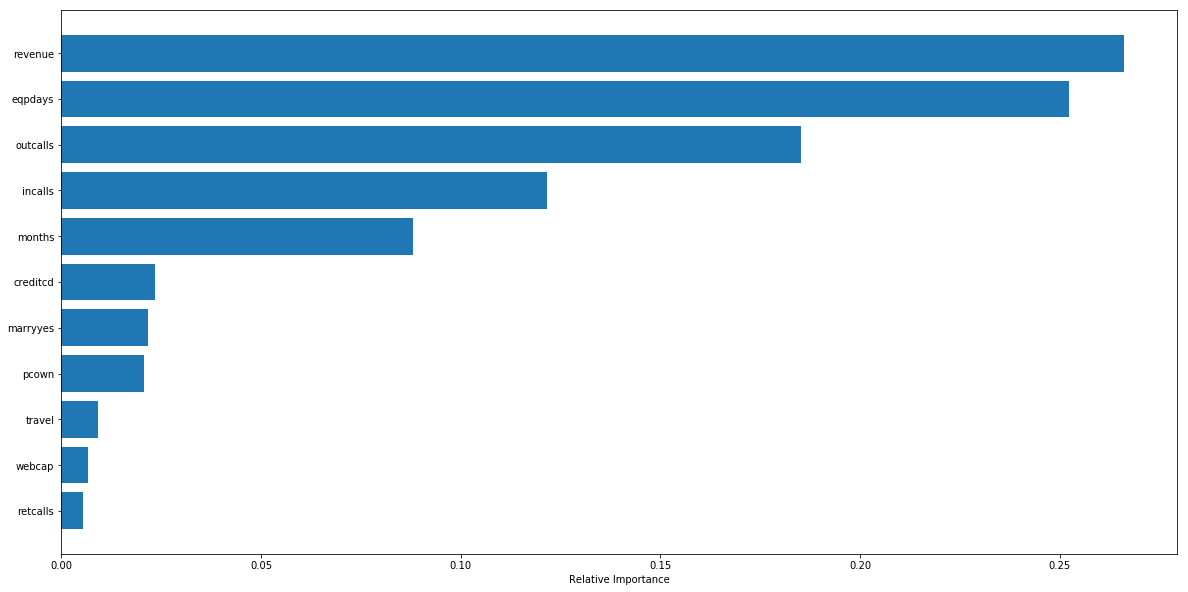

In [260]:
import matplotlib.pyplot as plt
%matplotlib inline

importance=DT.feature_importances_
index=importance.argsort()
objects=df.columns[index]
importance.sort()

fig=plt.figure()
fig.set_size_inches(20,10)
plt.title='Feature Importance'
plt.barh(objects,importance)
plt.xlabel('Relative Importance')
plt.show
# Code here

In [252]:
features[index]

Index(['revenue', 'outcalls', 'incalls', 'months', 'webcap', 'marryyes',
       'travel', 'pcown', 'creditcd', 'retcalls', 'eqpdays'],
      dtype='object')

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome? What "real-life" connection can you draw between each variable and churn? Make sure to state your answer, and not just show code.

In [261]:
# Code/answer here
train_df[['churndep','eqpdays','revenue','outcalls']].corr()

,churndep,eqpdays,revenue,outcalls
churndep,1.000000,0.113272,-0.009331,-0.038779
eqpdays,0.113272,1.000000,-0.226403,-0.247771
revenue,-0.009331,-0.226403,1.000000,0.498437
outcalls,-0.038779,-0.247771,0.498437,1.000000


1. Revenue is related to the churning activity because the lower the revenue of a customer, higher the porbability that the business of the customer is not running well and might stop the telecom service or choose other cheaper telecom company. If the revenue is high, it means that the business of customer went very well so they will not easily stop using the telecom service. So the revenue is negatively correlated with Churning.


2. The eqpdays is related to the churning because that the longer a customer use the equipment, the more likely that the equipment is not working so well due to the frequent use. Or people will just think the old equipment is out of time. So the customer will replace it after a period of time and may be choose another brand to get best deal. So the eqpdays is positively correlated with churning.


3. Number of outbound calls is related to churning because a large number of outbound call means that the customer using the telecom service very frequently and would not easily stop using the service. So the churning rate is low for them. Thus, the correlation between outbounds and churning is negative.


6\. Using the classifier built in 2.3, try predicting "churndep" on both the train_df and test_df data sets. What is the accuracy on each? What is your explanation on the difference (or lackthereof) between the two accuracies?

In [228]:
# Code here
from sklearn.metrics import accuracy_score
prediction_train=DT.predict(X_train)
prediction_test=DT.predict(X_test)
print('training set accuracy:\n'+str(accuracy_score(y_train,prediction_train)))
print('test set accuracy:\n'+str(accuracy_score(y_test,prediction_test)))

training set accuracy:
0.9998431962868881
test set accuracy:
0.5377571500250878


The accuracy of model on predicting the training set is 100% but on predicting the test set is just 53% because that we did not tackle the overfitting problem by setting the maximal layers, minimal splits, minimal leaf size and so on. In order to fits perfectly to the training set, the decision tree grows without a constraint. So the model has poor generalization ability. Thus, its performance is poor when facing the test set, the data that it has not meet before.

### Part 3 - Finding a Good Decision Tree (10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [240]:
# Code here
import numpy as np
min_samples_split_values = np.linspace(0.001,0.4,10,endpoint=True)
min_samples_leaf_values = np.linspace(0.001,0.3,10,endpoint=True)

2\. Explain in words your reasoning for choosing the above ranges.

### 1. Meaning: 
    The min_samples_split means the minimum number of samples required to split an node. The range is at least one sample at each node to all of the samples. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. If there is no constraint, the model will likely be overfitting. The min_samples_leaf stands for the minimum number of samples required to be at a leaf node. This describe the minimum number of samples at each leaf, the external node. If there is no constraint, the leaf can contain one sample point.


### 2. Why do I choose this range: 

    First round: Since the minimal split value can be from one sample to all samples, we first choose range 0.001 to 1 of sample. The minimal leaf can be from 1 sample to half of all samples, so we set the range to be 0.001 to 0.5. Then we plot the accuracy graph and find that when minimal leaf size is greater than 0.3 or minimal split size is over 0.4, the accuracy is poor.
    
    Second round: So we then set range of minimal split to be 0.001 to 0.4 and range of minimal leaf to be 0.001 to 0.3 and we get enough variance of results across values of min split and min leaf.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

In [241]:
import matplotlib.pyplot as plt
%matplotlib inline
test_accuracy=[]
for i in min_samples_leaf_values:
    A=[i]
    for j in min_samples_split_values:
        DT=tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=j,min_samples_leaf=i)
        DT.fit(X_train,y_train)
        prediction_test=DT.predict(X_test)
        A.append(accuracy_score(y_test,prediction_test))
    test_accuracy.append(A)
# Code here

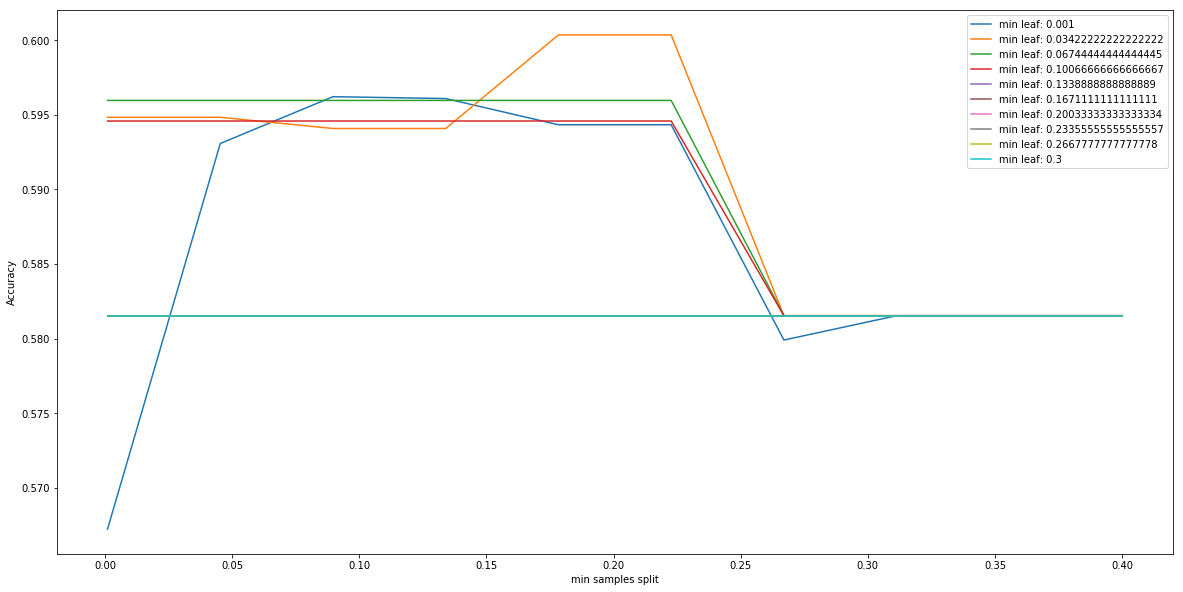

In [242]:
from matplotlib.legend_handler import HandlerLine2D
fig=plt.figure()
fig.set_size_inches(20,10)
for i in range(10):
    line= plt.plot(min_samples_split_values, test_accuracy[i][1:], label='min leaf: '+str(test_accuracy[i][0]))
plt.legend(handler_map={line1: HandlerLine2D(numpoints=10)},loc=0)
plt.ylabel('Accuracy')
plt.xlabel('min samples split')

plt.show()

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values), and reassess your answer in Q3.2.

In [225]:
#In the graph, we can see that when the min split is 0.2, min leaf is 0.035, the accuracy is highest. 
DT=tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=0.2,min_samples_leaf=0.035)
DT.fit(X_train,y_train)
prediction_test=DT.predict(X_test)
print('test set accuracy:\n'+str(accuracy_score(y_test,prediction_test)))

test set accuracy:
0.6004766683391871


5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

Answer here!

Q1. Churning is harmful because that it means decrease in revenue. We can use the churn prediction model to locate customers who are likely to churn in the near future. Then if we have the email address, phone number, or home address of those customoers, we can conduct target promotion strategy. We can send coupons or other specially designed advertisement like lower rate for the telecom service. If some customers have been inactive for a longer period of time and are identified as potential churning customers,we should also reach out to them and try to re-engage them or ask them why they’ve been inactive because they might be facing a problem that we can help. 


Q2. By doing the target promotion and intervention described in the first part, the prediction can acutally help business imporve its revuenue and decrease negative feedback by churning customers by decreasing the churning rate. So the churn prediction model is very desirable for the business.

Q3. By using the model, we can improve churn because we can use the method described in Q1 to motivate the potential churning customer to keep using the service. Besides, by checking the model, we can better understand what may cause customer to churn so we can improve the user experience and prevent customer from being potential churning customers.